### tmdb-movies Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import dateutil.parser
import re
from wordcloud import WordCloud
!pip install squarify
import squarify

pd.set_option("expand_frame_repr", True)




In [2]:
movies = pd.read_csv("tmdb-movies.csv", parse_dates = True)

In [3]:
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
movies["release_date"] = pd.to_datetime(movies["release_date"])

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [7]:
movies.shape

(10866, 21)

In [8]:
movies.sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7300,33638,tt0068853,0.130781,0,0,The Life and Times of Judge Roy Bean,Paul Newman|Jacqueline Bisset|Ned Beatty|Antho...,NaN,John Huston,If this story ain't true... it shoulda been!,...,"Outlaw and self-appointed lawmaker, Judge Roy ...",120,Action|Comedy|Western,First Artists|National General Pictures,1972-12-18,11,6.0,1972,0.000000e+00,0.000000e+00
4799,117978,tt1790869,0.213853,4000000,0,In Their Skin,Selma Blair|Joshua Close|James D'Arcy|Rachel M...,NaN,Jeremy Power Regimbal,Yours is the life they've chosen.,...,A couple and their young son retreat to their ...,96,Thriller|Horror,Kinosmith|Sepia Films,2012-07-08,20,5.2,2012,3.798977e+06,0.000000e+00
7159,8080,tt0324127,0.308525,27000000,13000000,Suspect Zero,Carrie-Anne Moss|Aaron Eckhart|Ben Kingsley|Ha...,NaN,E. Elias Merhige,Who's next?,...,"A killer is on the loose, and an FBI agent sif...",99,Crime|Thriller,Paramount Pictures|Cruise/Wagner Productions|L...,2004-08-27,42,5.1,2004,3.117003e+07,1.500779e+07


In [9]:
movies.columns.to_list()

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

#### PLotting a bar graph to compare budget and revenue before cleaning

In [10]:
comp = pd.DataFrame({"revenue": [movies.revenue.sum()],
         'budget': [movies.budget.sum()]})
comp

,revenue,budget
0,432720192875,158922868089


<AxesSubplot:>

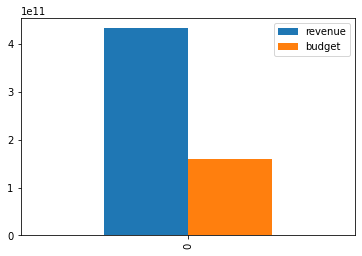

In [11]:
comp.plot(kind = 'bar')

### Data Cleaning

In [12]:
movies.duplicated().sum()

1

In [13]:
movies.drop_duplicates(inplace =True)

In [14]:
def missing_values(x):
    return (sum(x.isna()))
print("Missing values for each column: ")

print(movies.apply(missing_values).where(lambda x:x!=0).dropna())

Missing values for each column: 
imdb_id                   10.0
cast                      76.0
homepage                7929.0
director                  44.0
tagline                 2824.0
keywords                1493.0
overview                   4.0
genres                    23.0
production_companies    1030.0
dtype: float64


In [15]:
# Delete unwanted columns
movies.drop(['homepage','tagline','imdb_id','id', 'cast', 'vote_count'], axis =1, inplace=True)
movies.sample(2)

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
2837,0.189393,7000000,3646994,The Cat's Meow,Peter Bogdanovich,sex|blackmail|yacht|kiss|party,Semi-true story of the Hollywood murder that o...,114,Drama|Mystery|Thriller,Lions Gate Films|Dan Films|CP Medien AG,2001-08-03,5.7,2001,8.620417e+06,4.491230e+06
3544,0.656612,25000000,34942188,The Sitter,David Gordon Green,babysitting|duringcreditsstinger,"Noah, is not your typical entertain-the-kids-n...",81,Comedy,Twentieth Century Fox Film Corporation,2011-12-09,5.4,2011,2.423495e+07,3.387289e+07


In [16]:
movies.describe()

,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [17]:
#Remove columns with zero values
movies.drop(movies[movies.revenue == 0].index , inplace =True)
movies.drop(movies[movies.budget == 0].index , inplace =True)

In [18]:
print(movies.revenue.min())
print(movies.budget.min())

2
1


In [19]:
movies.fillna({'keywords' : 'movies.keywords.mode()', 'director' : "Other directors", 'production_companies' : 'Other'},
              inplace = True)

In [20]:
movies.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [21]:
Gs = movies.genres.str.split("|" , n=1 , expand = True)
kw = movies.keywords.str.split("|",n=1, expand = True)
ot = movies.original_title.str.split("|", n=1, expand =True)
pc = movies.production_companies.str.split("|", n= 1, expand = True)

In [22]:
movies["Genres"] = Gs[0]
movies["Keywords"] = kw[0]
movies["Original_title"] = ot[0]
movies["Production_companies"] = pc[0]

In [23]:
movies.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'Genres', 'Keywords', 'Original_title',
       'Production_companies'],
      dtype='object')

In [24]:
movies.drop(columns =['original_title','keywords','production_companies','genres'], inplace =True)

In [25]:
movies.columns.to_list()

['popularity',
 'budget',
 'revenue',
 'director',
 'overview',
 'runtime',
 'release_date',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj',
 'Genres',
 'Keywords',
 'Original_title',
 'Production_companies']

In [26]:
movies.shape

(3854, 15)

### Plotting a bar graph to compare revenue and budget after cleaning(Removing columns with zero)

In [27]:
com = pd.DataFrame({"revenue": [movies.revenue.sum()],
         'budget': [movies.budget.sum()]})
com

,revenue,budget
0,415024218442,143383048064


<AxesSubplot:>

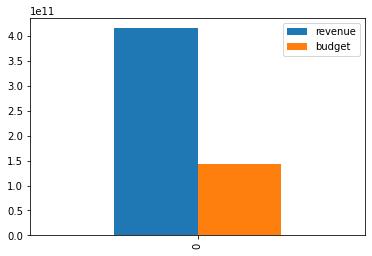

In [28]:
com.plot(kind = 'bar')

Removing rows with 0 budget and revenue values does not greatly affect our analysis 
thus we proceed to Exploratory Data Analysis

### EDA

#### General Analysis

In [29]:
#Total number of movies
all =len(movies.Original_title)
print("Movies analyzed: ", all)

Movies analyzed:  3854


In [30]:
# Total Budget
Total_budget = movies.budget.sum()
print("Total budget is: {: ,}".format(Total_budget))

Total budget is:  143,383,048,064


In [31]:
# Total revenue generated
Total_revenue = movies.revenue.sum()
print("Revenue generated is: {:,}".format(Total_revenue))

Revenue generated is: 415,024,218,442


In [32]:
#Profit
Total_profit = Total_revenue - Total_budget
print("Total profit is: {:,}".format(Total_profit))

Total profit is: 271,641,170,378


In [33]:
#Most Popular Movie
hp_movie = movies.popularity.max()
movies.loc[movies.popularity == hp_movie, 'Original_title']

0    Jurassic World
Name: Original_title, dtype: object

In [34]:
# An overview of the most popular movie
movies.loc[movies.Original_title == 'Jurassic World', 'overview']

0    Twenty-two years after the events of Jurassic ...
Name: overview, dtype: object

In [35]:
# Average runtime
round(movies.runtime.mean(),2)

109.22

#### Movie analysis by budget and Profit

In [36]:
#Top 5 movies with the highest budget
df_movies = movies.nlargest(5, ['budget'])
df_movies

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,Genres,Keywords,Original_title,Production_companies
2244,0.250540,425000000,11087569,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100,2010-12-02,6.4,2010,4.250000e+08,1.108757e+07,Adventure,assassin,The Warrior's Way,Boram Entertainment Inc.
3375,4.955130,380000000,1021683000,Rob Marshall,Captain Jack Sparrow crosses paths with a woma...,136,2011-05-11,6.3,2011,3.683713e+08,9.904175e+08,Adventure,sea,Pirates of the Caribbean: On Stranger Tides,Walt Disney Pictures
7387,4.965391,300000000,961000000,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha...",169,2007-05-19,6.8,2007,3.155006e+08,1.010654e+09,Adventure,ocean,Pirates of the Caribbean: At World's End,Walt Disney Pictures
14,5.944927,280000000,1405035767,Joss Whedon,When Tony Stark tries to jumpstart a dormant p...,141,2015-04-22,7.4,2015,2.575999e+08,1.292632e+09,Action,marvel comic,Avengers: Age of Ultron,Marvel Studios
6570,1.957331,270000000,391081192,Bryan Singer,"Set 5 years after the end of Superman II, the ...",154,2006-06-28,5.3,2006,2.920507e+08,4.230205e+08,Adventure,saving the world,Superman Returns,DC Comics


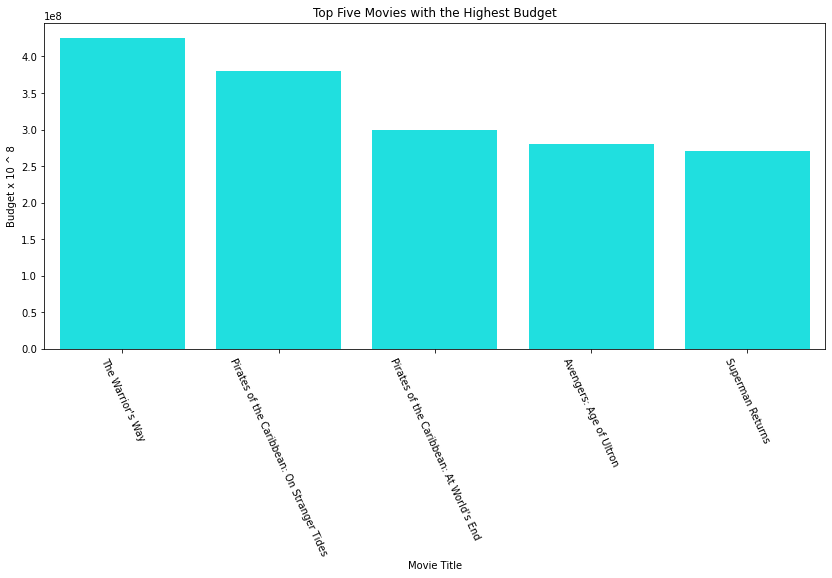

In [45]:
plt.figure(figsize=(14,6))
highest_budget = sns.barplot(x = "Original_title", y= 'budget', data = df_movies, color = "aqua")
highest_budget.set(ylabel ="Budget x 10 ^ 8")
highest_budget.set(xlabel = "Movie Title")
highest_budget.set(title = "Top Five Movies with the Highest Budget")
highest_budget.set_xticklabels(highest_budget.get_xticklabels(), rotation = -65);

In [46]:
#Lowest budget movies
df1_movies = movies.nsmallest(5, ["budget"])
df1_movies

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,Genres,Keywords,Original_title,Production_companies
2618,0.090186,1,100,Jeff Pollack,A comedy about finding your true love at any p...,95,1999-04-23,4.8,1999,1.309053,130.905285,Comedy,restaurant,Lost & Found,Alcon Entertainment
3581,0.520430,1,1378,Dermot Mulroney,A happy newlywed marriage counselor's views on...,90,2011-06-03,5.3,2011,0.969398,1335.830503,Comedy,wedding vows,"Love, Wedding, Marriage",120dB Films
8944,0.464188,2,16,Michael Winner,Paul Kersey is again a vigilante trying to fin...,88,1982-02-20,5.6,1982,4.519285,36.154278,Action,rape,Death Wish 2,Cannon Films
2398,0.028456,3,43,Taika Waititi,"It's 1984, and Michael Jackson is king - even ...",87,2010-02-14,7.3,2010,3.000000,43.000000,Drama,new zealand,Boy,New Zealand Film Commission
10050,0.317091,3,16,John Harrison,The first segment features an animated mummy s...,93,1990-05-03,5.8,1990,5.006696,26.702377,Fantasy,anthology,Tales from the Darkside: The Movie,Paramount Pictures


Text(0.5, 1.0, 'Top 5 low budget movies')

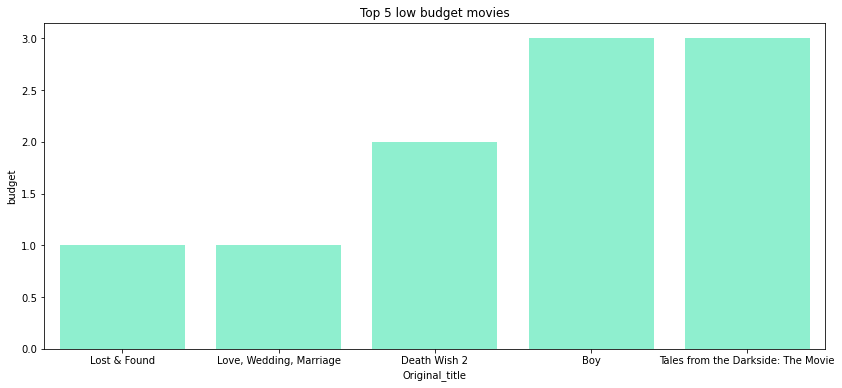

In [47]:
plt.figure(figsize =(14,6))
sns.barplot(x = "Original_title", y = "budget", data = df1_movies, color ="aquamarine")
plt.title("Top 5 low budget movies")

In [48]:
#Add a column profit
movies['profit'] = movies['revenue'] - movies['budget']
movies.sample(3)

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,Genres,Keywords,Original_title,Production_companies,profit
5075,0.439958,20000000,37095657,Boaz Yakin,"Molly Gunn, the freewheeling daughter of a dec...",92,2003-08-15,6.2,2003,2.370705e+07,4.397144e+07,Comedy,new york,Uptown Girls,GreeneStreet Films,17095657
5010,0.920571,9500000,107071655,Marcus Nispel,After picking up a traumatized young hitchhike...,98,2003-10-17,6.0,2003,1.126085e+07,1.269177e+08,Horror,trauma,The Texas Chainsaw Massacre,New Line Cinema,97571655
8808,0.223263,10000000,26330482,Nigel Cole,"Unexpectedly widowed, prim and proper housewif...",93,2000-01-24,6.2,2000,1.266292e+07,3.334208e+07,Crime,drug dealer,Saving Grace,Homerun Productions,16330482


In [49]:
#Top 5 highest profits
h_profit = movies.nlargest(5, "profit")
h_profit

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,Genres,Keywords,Original_title,Production_companies,profit
1386,9.432768,237000000,2781505847,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,2009-12-10,7.1,2009,2.408869e+08,2.827124e+09,Action,culture clash,Avatar,Ingenious Film Partners,2544505847
3,11.173104,200000000,2068178225,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,Action,android,Star Wars: The Force Awakens,Lucasfilm,1868178225
5231,4.355219,200000000,1845034188,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,1997-11-18,7.3,1997,2.716921e+08,2.506406e+09,Drama,shipwreck,Titanic,Paramount Pictures,1645034188
0,32.985763,150000000,1513528810,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,monster,Jurassic World,Universal Studios,1363528810
4,9.335014,190000000,1506249360,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,Action,car race,Furious 7,Universal Pictures,1316249360


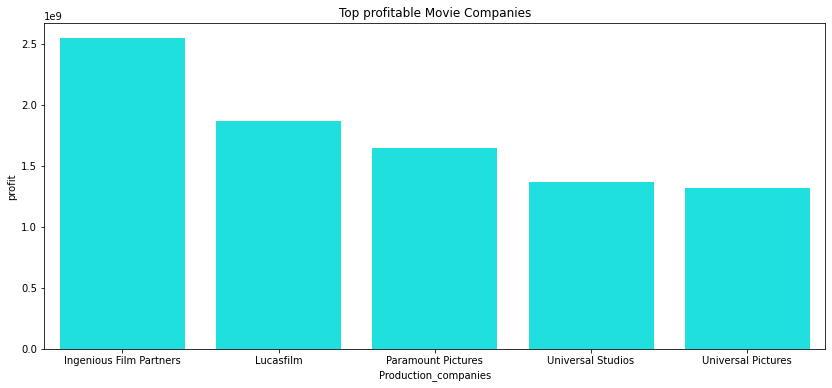

In [50]:
plt.figure(figsize = (14,6))
profit_co =sns.barplot(x = "Production_companies", y = "profit", data = h_profit, color = "aqua")
profit_co.set(title = "Top profitable Movie Companies")
profit_co.set_xticklabels(profit_co.get_xticklabels());

#### Movies Analysis by Revenue

In [51]:
# Shortest runtime
movies.runtime.min()


15

In [52]:
# Longest runtime
movies.runtime.max()

338

Text(0.5, 1.0, 'Revenue generated by movie runtime')

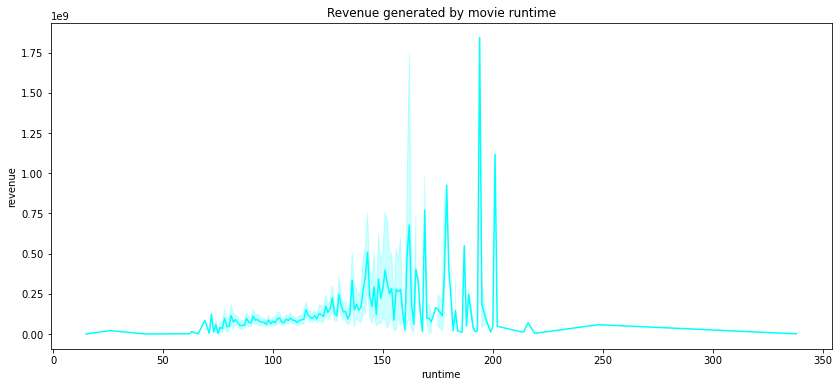

In [53]:
plt.figure(figsize=(14,6))
sns.lineplot(x ='runtime', y = 'revenue', data = movies, color = "aqua")
plt.title("Revenue generated by movie runtime")

Text(0.5, 1.0, 'Revenue by Year')

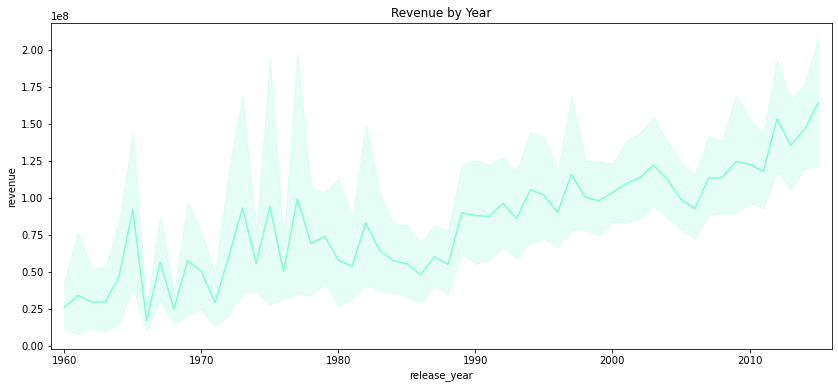

In [54]:
plt.figure(figsize=(14,6))
sns.lineplot(x ="release_year", y= "revenue", data = movies, color = "aquamarine")
plt.xlim(1959, 2016)
plt.title("Revenue by Year")

In [55]:
#Total revenue by year
df5_movies = movies.groupby("release_year")[['revenue']].sum()

In [56]:
#Bottom 5 years with the lowest revenue
hr = df5_movies['revenue'].nsmallest(5)
hr = pd.DataFrame(hr)
hr

,revenue
release_year,
1966,84736689
1960,129005000
1963,176526882
1962,206329846
1968,222221762


In [57]:
df7_movies = movies.nlargest(5, "revenue")
df7_movies

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,Genres,Keywords,Original_title,Production_companies,profit
1386,9.432768,237000000,2781505847,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,2009-12-10,7.1,2009,2.408869e+08,2.827124e+09,Action,culture clash,Avatar,Ingenious Film Partners,2544505847
3,11.173104,200000000,2068178225,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,Action,android,Star Wars: The Force Awakens,Lucasfilm,1868178225
5231,4.355219,200000000,1845034188,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,1997-11-18,7.3,1997,2.716921e+08,2.506406e+09,Drama,shipwreck,Titanic,Paramount Pictures,1645034188
4361,7.637767,220000000,1519557910,Joss Whedon,When an unexpected enemy emerges and threatens...,143,2012-04-25,7.3,2012,2.089437e+08,1.443191e+09,Science Fiction,new york,The Avengers,Marvel Studios,1299557910
0,32.985763,150000000,1513528810,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,monster,Jurassic World,Universal Studios,1363528810


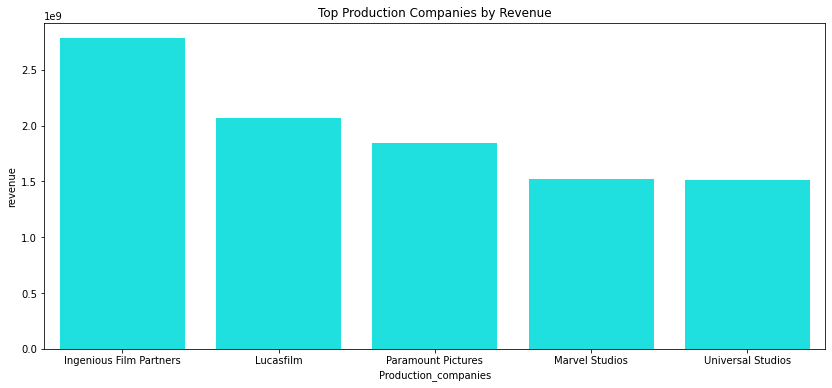

In [58]:
plt.figure(figsize=(14,6))
pc = sns.barplot(x = 'Production_companies', y = 'revenue', data = df7_movies, color = "aqua")
pc.set(title = "Top Production Companies by Revenue")
pc.set_xticklabels(pc.get_xticklabels());


### Relationship between the budget and the revenue

Text(0.5, 1.0, 'Relationship between budget and revenue')

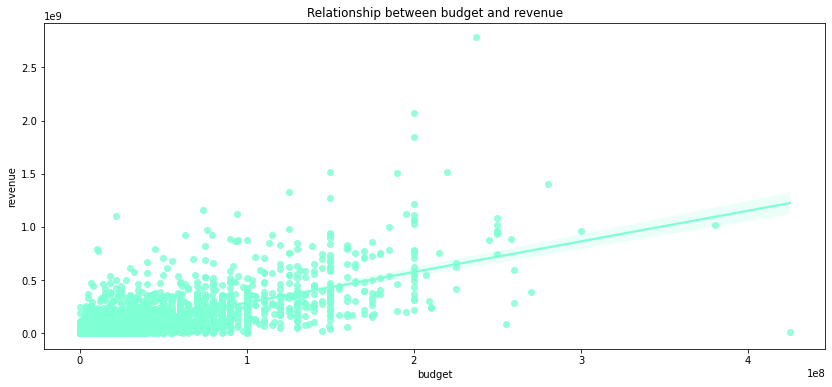

In [59]:
plt.figure(figsize = (14,6))
sns.regplot(x = 'budget', y = 'revenue', data = movies, color = "aquamarine")
plt.title("Relationship between budget and revenue")

#### Movie Analysis by popularity

In [60]:
#Top 5 movies with the highest rating
df3_movies = movies.nlargest(5, ["vote_average"])
df3_movies

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,Genres,Keywords,Original_title,Production_companies,profit
4178,7.192039,25000000,28341469,Frank Darabont,Framed in the 1940s for the double murder of h...,142,1994-09-10,8.4,1994,3.677779e+07,4.169346e+07,Drama,prison,The Shawshank Redemption,Castle Rock Entertainment,3341469
7948,0.283191,1200000,4978922,Jonathan Demme,David Byrne walks onto the stage and does a so...,88,1984-11-16,8.4,1984,2.518850e+06,1.045097e+07,Documentary,concert,Stop Making Sense,Talking Heads,3778922
7269,5.738034,6000000,245066411,Francis Ford Coppola,"Spanning the years 1945 to 1955, a chronicle o...",175,1972-03-15,8.3,1972,3.128737e+07,1.277914e+09,Drama,italy,The Godfather,Paramount Pictures,239066411
650,4.780419,3300000,13993093,Damien Chazelle,"Under the direction of a ruthless instructor, ...",105,2014-10-10,8.2,2014,3.039600e+06,1.288891e+07,Drama,jazz,Whiplash,Bold Films,10693093
2409,8.947905,63000000,100853753,David Fincher,A ticking-time-bomb insomniac and a slippery s...,139,1999-10-14,8.1,1999,8.247033e+07,1.320229e+08,Drama,support group,Fight Club,Regency Enterprises,37853753


In [61]:
dfa = df3_movies[["Original_title", 'vote_average']]
dfa

,Original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2409,Fight Club,8.1


(0.0, 100.0, 0.0, 100.0)

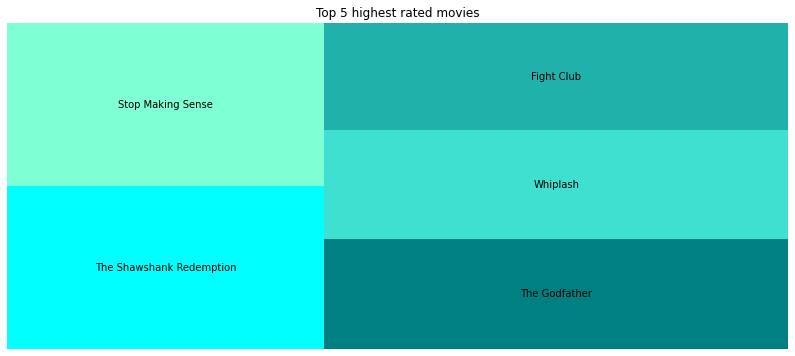

In [62]:
plt.figure(figsize =(14,6))
squarify.plot(dfa.vote_average, label = dfa.Original_title, color = ['aqua', "aquamarine","teal", "turquoise", "lightseagreen"])
plt.title("Top 5 highest rated movies")
plt.axis("off")

In [63]:
#Top 5 movies with the lowest rating
df4_movies = movies.nsmallest(5, ["vote_average"])
df4_movies
lr_movies = df4_movies[["Original_title","vote_average"]]
lr_movies

,Original_title,vote_average
4859,Foodfight!,2.2
3134,Disaster Movie,3.3
4115,FearDotCom,3.3
4540,Dracula 3D,3.3
5082,House of the Dead,3.4


Text(0.5, 1.0, 'Bottom 5 Lowest Rated movies')

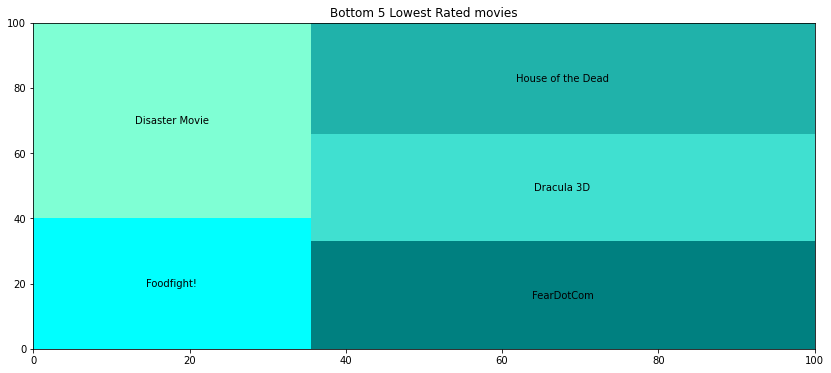

In [64]:
plt.figure(figsize=(14,6))
squarify.plot(lr_movies.vote_average, label = lr_movies.Original_title, 
              color = ['aqua', "aquamarine","teal", "turquoise", "lightseagreen"])
plt.title("Bottom 5 Lowest Rated movies")

In [65]:
# Top 5 years with the lowest revenue
df5_movies['revenue'].nlargest(5)

release_year
2015    26202922801
2013    24350666103
2012    24184456032
2014    24069969357
2011    23408245247
Name: revenue, dtype: int64

In [66]:
p_movies = movies.nlargest(5, ['popularity'])
p_movies

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,Genres,Keywords,Original_title,Production_companies,profit
0,32.985763,150000000,1513528810,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,monster,Jurassic World,Universal Studios,1363528810
1,28.419936,150000000,378436354,George Miller,An apocalyptic story set in the furthest reach...,120,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,future,Mad Max: Fury Road,Village Roadshow Pictures,228436354
629,24.949134,165000000,621752480,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169,2014-11-05,8.0,2014,1.519800e+08,5.726906e+08,Adventure,saving the world,Interstellar,Paramount Pictures,456752480
630,14.311205,170000000,773312399,James Gunn,"Light years from Earth, 26 years after being a...",121,2014-07-30,7.9,2014,1.565855e+08,7.122911e+08,Action,marvel comic,Guardians of the Galaxy,Marvel Studios,603312399
2,13.112507,110000000,295238201,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,Adventure,based on novel,Insurgent,Summit Entertainment,185238201


[Text(0.5, 1.0, 'Top 5 Popular Movies')]

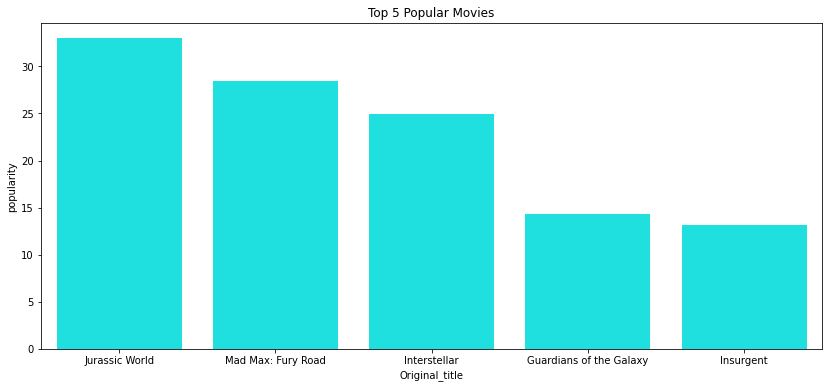

In [67]:
plt.figure(figsize=(14,6))
movies_p = sns.barplot(x = 'Original_title',  y = 'popularity', data = p_movies, color = 'aqua')
movies_p.set(title = "Top 5 Popular Movies")

Text(0.5, 1.0, 'Top 5 Featured Directors on tmdb movies')

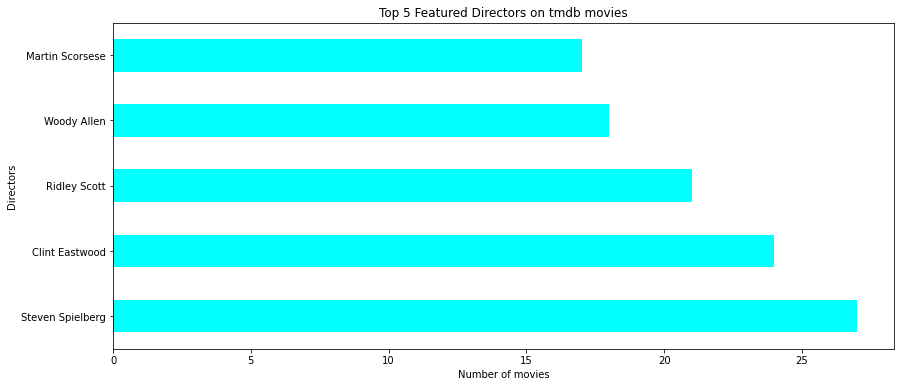

In [68]:
plt.figure(figsize = (14,6))
movies['director'].value_counts()[:5].plot(kind ='barh', color ="aqua")
plt.ylabel("Directors")
plt.xlabel("Number of movies")
plt.title("Top 5 Featured Directors on tmdb movies")

#### Frequently used keywords

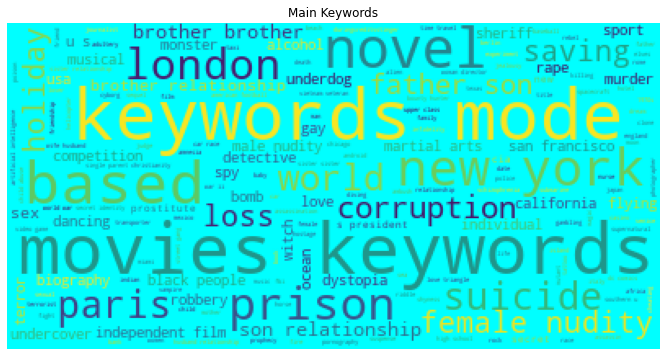

In [69]:
plt.figure(figsize=(14,6))
wordcloud = WordCloud(background_color = "aqua").generate(" ".join(movies.Keywords))
plt.title("Main Keywords")
plt.axis("off")
plt.imshow(wordcloud)
plt.show()